# Welcome to AAS!

## Getting Started in Python

In this course, we assume a very basic knowledge of python syntax, which can be learned in a variety of places, including directly from the [Python Software Foundation](https://www.python.org/about/gettingstarted/).

This notebook will introduce the main python packages we will be using in this course:

* `numpy` for numerical calculations
* `scipy` for mathematical algorithms
* `matplotlib` for visualisation
* `pandas` for data wrangling
* `statsmodels` for statistical algorithms

All of these packages are currently included when you install [Anaconda](https://www.anaconda.com/). Anaconda also makes sure that the versions of each package are consistent and provides helpful tools like Jupyter Lab, where you can run this notebook. 


### NumPy

[NumPy](https://numpy.org/) provides the _array_ data type and a wide range of functions to work with them. This pacakge forms the foundation for most scientific computation done with python. Spending time getting comfortable with using numpy is a wise investment. If you have used vectors in either MATLAB or R the numpy array should feel familiar. The numpy organization has [learning resources](https://numpy.org/learn/) on their website.

### SciPy

[SciPy](https://docs.scipy.org/doc/scipy/tutorial/general.html) provides a wide range of mathematical algorithms. For example, there are clustering algorithms, fourier transforms, numerical integration, and optimisation and root-finding algorithms. scipy makes use of the numpy array.

### Matplotlib

Matplotlib is a general purpose plotting library for python. Visualisation is a key skill of the statistician, learning how to use an established plotting library is another wise investment. You can view a gallery of images made using matplotlib and their associated code [here](https://matplotlib.org/stable/gallery/index.html). There are many plotting libraries out there, but Matplotlib is probably the most established plotting library in python so it is a good place to start. If you want to explore alternatives, [seaborn](https://seaborn.pydata.org/index.html) is a wrapper around matplotlib designed for statistical graphics and [altair](https://altair-viz.github.io/) is a more powerful declarative plotting package.

### Pandas

Much of the data we will consider in this course is _tabular_, meaning it can be represented as a table of values. The _dataframe_ is a data structure particularly well suited for working with tabular data. If you have any experience with R you will no doubt be familiar with its `data.frame`s. Pandas is an attempt to bring this functionality to the python ecosystem. Pandas provides some visualisation functionality but it is less flexible than matplotlib.

### Statsmodels

This package provides statistical algorithms. For example, there are functions to fit linear and genealized linear models to data.

## Numpy

The first thing to do with any package is to import it. The convention when using numpy is to import it as `np`.

In [1]:
import numpy as np

Since we don't have any data yet, we will generate an array containing some numbers. The `linspace` function returns an array of uniformly spaced values.

In [2]:
x = np.linspace(1, 8, 101)

### Basic Functions
There are lots of things we want to be able to do with arrays: find the minimum and maximum, range of values, and sum of the values for example. Some of these are methods of the numpy array, so we use `x.method()`. For others, the functions are part of numpy itself, so we use `np.function(x)`. Finally, the length of an array is native to python, so we call it directly `len(x)`. You'll learn over time where different operations live, or you can always search online in the documentation.

In [3]:
print(f'Min:   {x.min()}')
print(f'Max:   {x.max()}')
# ptp returns the range of values in the array.
print(f'Range: {x.ptp()}')
print(f'Sum:   {np.sum(x)}')
print(f'Count: {len(x)}')

Min:   1.0
Max:   8.0
Range: 7.0
Sum:   454.5000000000001
Count: 101


There are also a range of statistical functions provided by numpy that are worth knowing about. It's also a good habit to think about your reader when presenting information. Here, we have rounded to two decimal places.

In [4]:
print(f'Median:   {np.median(x):.2f}')
print(f'Mean:     {np.mean(x):.2f}')
print(f'Std Dev:  {np.std(x):.2f}')
print(f'Variance: {np.var(x):.2f}')

Median:   4.50
Mean:     4.50
Std Dev:  2.04
Variance: 4.17


Numpy also contains a lot of mathematical functions, many of which are vectorised. This means that they apply element-wise to the values in the array. For example, we can evaluate the sine function on each element of the array.

In [5]:
x = np.array([0, np.pi/2, np.pi,3*np.pi/2,2*np.pi])
sin_vals = np.sin(x)
print(sin_vals)

[ 0.0000000e+00  1.0000000e+00  1.2246468e-16 -1.0000000e+00
 -2.4492936e-16]


### Indexing and Filtering

You can access a particular element of an array using square braces.

In [6]:
x = np.array([0, np.pi/2, np.pi,3*np.pi/2,2*np.pi])
print(x[0])
print(f'{x[1]:.2f}')

0.0
1.57


We might also want to count how many values are bigger than some threshold. Similar to the sine function, logical operations can be vectorized, so `>` returns a Boolean array indicating which numbers are greater than the threshold.

In [7]:
x>3

array([False, False,  True,  True,  True])

We can use that array as a filter on the original array to find just the values greater than 3.

In [8]:
x[x > 3]

array([3.14159265, 4.71238898, 6.28318531])

From here, it is easy to count them. In fact, there are multiple ways to do it. We showed you `len(x)` before, but `x.size` is a better for numpy arrays because it would work even if `x` had more than one dimension.

In [9]:
x[x>3].size

3

**WARNING:** There are a couple of ways to index into a numpy array and they have different effects. Understanding how to exploit this is useful but beyond the scope of this course. 

### Question

Implement a function to compute the median of an array without using the `median` method. Did it mutate your array? Did you need to make a copy of the array? We've given you a starter function and a testing example to help.

_Hint:_ [sort function](https://numpy.org/doc/stable/reference/generated/numpy.sort.html?highlight=sort#numpy.sort), [sort method](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.sort.html?highlight=sort#numpy.ndarray.sort)

In [10]:
def my_median(a):
    return 0.

In [11]:
aa = np.linspace(-5,5,11)

print(f'Actual Median: {np.median(aa)}\n'
      f'My Median {my_median(aa)}\n'
      f'Test Result: {np.median(aa) == my_median(aa)}\n')

Actual Median: 0.0
My Median 0.0
Test Result: True



#### Answer

In [12]:
def my_median(a):
    tmp = np.sort(a)
    n = len(a)
    ix = round(np.floor(n/2))
    if n % 2 == 0:
        return (0.5 * (tmp[ix-1] + tmp[ix]))
    else:
        return (tmp[ix])
    
aa = np.array([1.])
print(f'Actual Median: {np.median(aa)}\n'
      f'My Median {my_median(aa)}\n'
      f'Test Result: {np.median(aa) == my_median(aa)}\n')
aa = np.array([2.,1.])
print(f'Actual Median: {np.median(aa)}\n'
      f'My Median {my_median(aa)}\n'
      f'Test Result: {np.median(aa) == my_median(aa)}\n')
aa = np.array([2.,3.,1.])
print(f'Actual Median: {np.median(aa)}\n'
      f'My Median {my_median(aa)}\n'
      f'Test Result: {np.median(aa) == my_median(aa)}\n')
aa = np.array([4.,2.,3.,1.])
print(f'Actual Median: {np.median(aa)}\n'
      f'My Median {my_median(aa)}\n'
      f'Test Result: {np.median(aa) == my_median(aa)}\n')

Actual Median: 1.0
My Median 1.0
Test Result: True

Actual Median: 1.5
My Median 1.5
Test Result: True

Actual Median: 2.0
My Median 2.0
Test Result: True

Actual Median: 2.5
My Median 2.5
Test Result: True



## Scipy

The convention here is to import the statistics submodule as `stats`.

In [13]:
import scipy.stats as stats

Generating random numbers is a common task in statistics. There are lots of [distributions](https://docs.scipy.org/doc/scipy/reference/stats.html#probability-distributions) available in scipy. The lines below return arrays of normal random variables with a specified mean and standard deviation. In general, you should check the documentation for the definition used for `loc` and `scale` as it can vary.

In [14]:
norm_rvs = stats.norm.rvs(loc = 0, scale = 1, size = 101)

The `stats.norm` object has lots of methods though, for example, you can ask for the mean of the distribution and evaluate its probability density function.

In [15]:
stats.norm.mean(loc = 0, scale = 1)

0.0

In [16]:
stats.norm.pdf(x = 1, loc = 0, scale = 1)



0.24197072451914337

### Question

Generate a large number of random variable with a geometric distribution with parameter $p = 1/2$ and confirm that the average of these values is close to the mean of that distribution. 

*Hint:* the [wikipedia page](https://en.wikipedia.org/wiki/Geometric_distribution) for the geometric distribution may be useful with this.

#### Answer

Use `stats.geom.rvs(p=0.5, size=10000)` to get the array of values and the `mean` method to compute the mean. You can calculate the mean of this distribution as $1/p$ of use the method which does this `stats.geom.mean(p=0.5)`

### Question

The median and mean are to ways to describe "middle" of a dataset. When would the mean be more useful? When would the median be more useful?

#### Answer

Individuals' income provides us examples both ways:

- the mean is more useful when you care about the population as a whole. For example, the mean would be useful if you were trying to estimate the total earnings of people aged $+50$ a random sample.
- the median is more useful if you are trying to understand the bulk of the population excluding outliers. For example, the median would be useful if you were trying to describe the earnings of $90\%$ of voters.

## Matplotlib

We will primarily use the pyplot interface for matplotlib. The convention here is to import this module as `plt`. The command `%matplotlib inline` is called "cell magic" and makes the plots appear under the cells in Jupyter notebooks.

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

Below we provide the code for some of the fundemental plots you will need. There is an extensive [gallery](https://matplotlib.org/stable/gallery/index.html) to demonstrate more complex plots. 

### Line plot

In [18]:
x = np.linspace(0,np.pi*2,101)
sin_vals = np.sin(x)

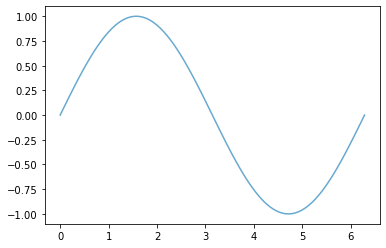

In [19]:
plt.figure()
plt.plot(x, sin_vals, color = "#67a9cf")
plt.show()

### Scatter plot

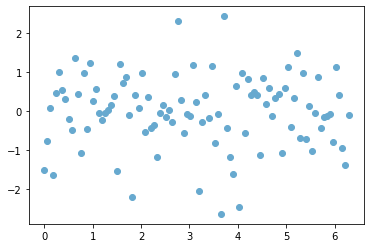

In [20]:
plt.figure()
plt.scatter(x, norm_rvs, color = "#67a9cf")
plt.show()

### Histogram

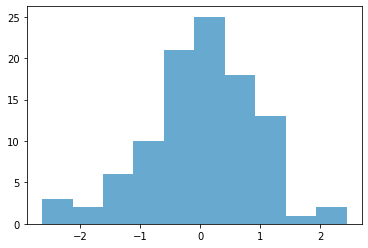

In [21]:
plt.figure()
plt.hist(norm_rvs, bins = 10, color = "#67a9cf")
plt.show()

### Multiple layers

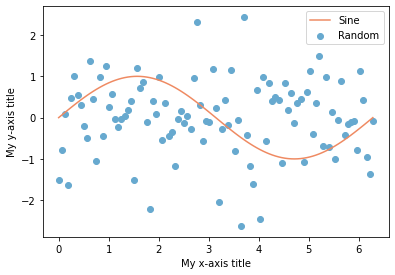

In [22]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(x, sin_vals, color = "#ef8a62", label = "Sine")
ax.scatter(x, norm_rvs, color = "#67a9cf", label = "Random")
ax.legend(loc = "upper right")
ax.set_xlabel("My x-axis title")
ax.set_ylabel("My y-axis title")
plt.show()

### Question

Without looking at the answer below, attmpet to create this plot where the histogram is of 1000 exponential random variables, $\lambda = 1.0$, and we have drawn the density of this distribution on top.

<img src="./challenge-figure-hist.png" style="width: 500px;"/>

#### Answer

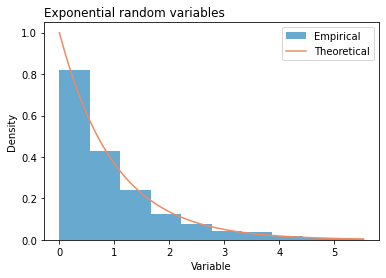

In [23]:
exp_rvs = stats.expon.rvs(scale = 1, size = 1000)
exp_x = np.linspace(exp_rvs.min(), exp_rvs.max(), 100)
exp_y = stats.expon.pdf(x = exp_x, scale = 1)

plt.figure()
plt.hist(exp_rvs, density=True, color = "#67a9cf", label = "Empirical")
plt.plot(exp_x, exp_y, color = "#ef8a62", label = "Theoretical")
plt.legend(loc = "upper right")
plt.xlabel("Variable")
plt.ylabel("Density")
plt.title("Exponential random variables", loc = "left")
plt.show()

### Question

A simple way to approximate pi is to inscribe a circle into a square. The area of the circle divided by the area of the square will be pi/4. Create an image like the one below, which uses this approach to approximate the value of pi. Be sure the title updates automatically.

<img src="./challenge-figure-pi.png" style="width: 500px;"/>

#### Answer

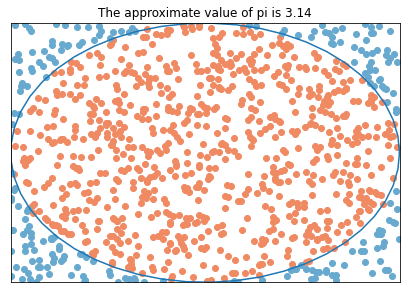

In [24]:
x = np.random.uniform(-1,1,size = 1000)
y = np.random.uniform(-1,1,size = 1000)

deg = np.linspace(0,2*np.pi)
x_circ = np.cos(deg)
y_circ = np.sin(deg)

mask = x ** 2 + y ** 2 < 1

fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.9,0.9])
ax.scatter(x[mask], y[mask], color = "#ef8a62")
ax.scatter(x[np.logical_not(mask)], y[np.logical_not(mask)], color = "#67a9cf")
ax.plot(x_circ, y_circ)
ax.get_xaxis().set_visible(False)
ax.set_xlim(-1,1)
ax.get_yaxis().set_visible(False)
ax.set_ylim(-1,1)
ax.set_title(f'The approximate value of pi is {mask.sum()*4 / mask.size}')
plt.savefig('challenge-figure-pi.png',bbox_inches='tight')

### Extra Challenge

It is possible to compute the standard deviation of the distribution of estimated values for pi using a binomial distribution. In the example above, we take 1000 samples. How many samples would be needed to ensure that the estimate is correct to three digits (3.141) with 99% probability?

**Note**: This is beyond the scope of this section, but is something you should be able to work out by the end of the course.

## Pandas

Pandas provides functions for a lot of standard data manipulations, and is a very popular Python package in data science for that reason. This includes functions for [reading data from many formats](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html#min-tut-02-read-write). The convention is to import it as `pd`. The `head` method prints the first couple of rows in the dataframe.

In [25]:
import pandas as pd

The `read_csv` function will read a CSV into a pandas dataframe. Pandas will first attempt to load the data from a local file, but if it cannot find `iris.csv` it will attempt to download it from the URL given. Here we are loading the `iris` data set, which has some information about flowers of three related species.

In [26]:
iris_url = "https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-0/iris.csv"
iris_file = "iris.csv"

try:
    iris = pd.read_csv(iris_file)
    print("iris loaded from file\n")
except:
    print("Could not load iris from file, defaulting to URL")
    iris = pd.read_csv(iris_url)
    print("iris loaded from URL\n")
        
iris.head()

iris loaded from file



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The following cell demonstrates how we can use the `query` method to select a subset of the data and then plot it.

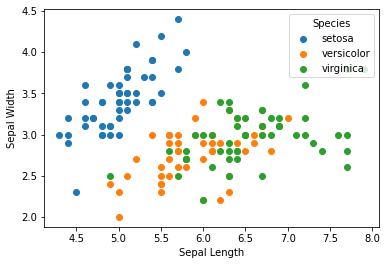

In [27]:
plt.figure()
for species in iris.species.unique():
    tmp = iris.query("species == '{s}'".format(s = species))
    plt.scatter(tmp.sepal_length, tmp.sepal_width, label = species)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend(title = "Species", loc = "upper right")
plt.show()

Pandas provides many tools to wrangle data. The following example summarises the sepal length of each species. It starts by grouping the data by species, then it extracts the sepal length variable, finally it computes the mean and standard deviation of these values

In [28]:
iris_summary = iris.groupby("species")[["sepal_length"]].agg({"sepal_length": ["std", "mean"]})
print(iris_summary)

           sepal_length       
                    std   mean
species                       
setosa         0.352490  5.006
versicolor     0.516171  5.936
virginica      0.635880  6.588


Depending upon the version of pandas the previous code may throw an error. If that is the case, try replacing it with the following

```
iris_summary = iris.groupby("species").agg({"sepal_length": ["std", "mean"]})
```

This data can then be represented as a bar chart with error bars to indicate two standard deviations about the mean. This is a popular way to visualise this sort of data. It is not the optimal way to represent this data, can you think of a better way? Why do you think we have used two standard deviations in the error bars?

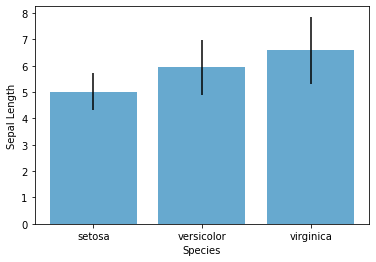

In [29]:
plt.figure()
plt.bar(iris_summary.index, 
        iris_summary.sepal_length["mean"], 
        yerr=2*iris_summary.sepal_length["std"],
        color = "#67a9cf")
plt.xlabel("Species")
plt.ylabel("Sepal Length")
plt.show()

### Question

Find a better (in your opinion) way to display these data and explain why you think it is better.

#### Answer

Here is a subjective list:

1. _swarm plot_
2. _jittered scatter plot_
3. _box plot_
4. _violin plot_

Plots that display the data in a clean way with minimal loss of information are preferable.

### Question

What do you notice about the correlation between the sepal length and width? Is there a positive or negative correlation?

* _Hint 1_ [hmmm](https://en.wikipedia.org/wiki/Simpson%27s_paradox)
* _Hint 2_ [it should only take two lines of code](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.corr.html?highlight=corr#) 


#### Answer

This is a classic example of Simpson's paradox. If you just look at the correlation without considering that they are drawn from different species, you will get a surprising answer. If you look at the correlations after grouping the data by species you get a far more reasonable result.

The two lines of code to see this are shown below.


In [30]:
iris.filter(items = ["sepal_length", "sepal_width", "species"]).corr()

,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


In [31]:
iris.groupby("species")[["sepal_length", "sepal_width"]].corr()

sepal_length  sepal_width
species                                           
setosa     sepal_length      1.000000     0.742547
           sepal_width       0.742547     1.000000
versicolor sepal_length      1.000000     0.525911
           sepal_width       0.525911     1.000000
virginica  sepal_length      1.000000     0.457228
           sepal_width       0.457228     1.000000

## Statsmodels

We will cover this in subsequent tutorials when we begin to deal with models and regression.

## US census data

For the rest of this notebook, we will apply the things we've learned to actual data. There are lots of great datasets freely available online. The dataset we will use comes from the 1994 US census and is available as part of the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Adult). We will start by reading in the data and ensuring that the column names have been specified correctly. In this case the data is in the `adult.data` file, which is a CSV, and the meta-data, the column names, is in `adult.header`. Sometimes these data are combined in a single file, sometimes they are separate.

An important takeaway from this section is the value of visual presentation. In many cases, a good chart tells you more about the data than just the descriptive statistics.

In [32]:
header_url = "https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-0/adult.header"
data_url = "https://raw.githubusercontent.com/aezarebski/aas-extended-examples/main/example-0/adult.data"

header_file = "adult.header"
data_file = "adult.data"

try:
    with open(header_file) as f:
        header = f.readlines()[0].split(',')
    df = pd.read_table(data_file, delimiter = ",", names=header)
except:
    print("Could not load census from file, defaulting to URL")
    header = list(pd.read_csv(header_url))
    df = pd.read_table(data_url, delimiter = ",", names=header)
    print("iris loaded from URL\n")

### Tables

Word processor software will typically have functionality for creating tables. Often when working with code it is useful to be able to construct a table in plain text. An excellent tool for creating tables for LaTeX, HTML or Markdown is [Tables Generator](https://www.tablesgenerator.com/).

### Question

Fill in the values in the following table

| Variable                            | Value |
|-------------------------------------|:-----:|
| Number, _N_                         |   ?   |
| Sex, female, _N_ (%)                | ? (?) |
| Age [years], mean (SD)              | ? (?) |
| Hours worked per week, median (IQR) | ? (?) |

If this seems too easy, why not try generate the text for a markdown table too!

- [hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
- [hint](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.quantile.html)

#### Answer

| Variable                            | Value |
|-------------------------------------|:-----:|
| Number, _N_                         |   32561   |
| Sex, female, _N_ (%)                | 10771 (33.1) |
| Age [years], mean (SD)              | 38.6 (13.6) |
| Hours worked per week, median (IQR) | 40 (5) |

In [33]:
print(f"The number of records is {df.shape[0]}")
print(f"The number of records with sex as female is {df.sex.value_counts()[' Female']} ({df.sex.value_counts()[' Female'] / df.shape[0]:.1%})")
print(f"The mean age is {df.age.mean():.1f} with a standard deviation of {df.age.std():.1f}")

hpw_quantiles = dict(df['hours-per-week'].quantile([0.25,0.5,0.75]))
hpw_iqr = hpw_quantiles[0.75] - hpw_quantiles[0.25]
print(f"The median hours per week worked is {hpw_quantiles[0.5]} with an IQR of {hpw_iqr}")

The number of records is 32561
The number of records with sex as female is 10771 (33.1%)
The mean age is 38.6 with a standard deviation of 13.6
The median hours per week worked is 40.0 with an IQR of 5.0


### Question

Create a histogram of the ages with 70 bins. What do you notice?

- [hint](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)

#### Answer

Using 70 bins leads to several bins containing two ages while the others contain only one. This obscures the true distribution. Whenever you are using histograms you need to be careful with the number of bins used.

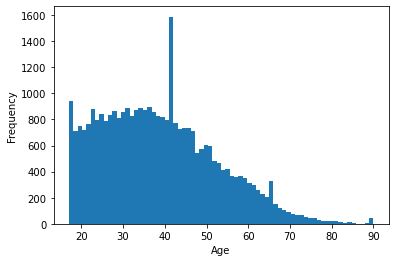

In [34]:
plt.figure()
plt.hist(df.age, bins = 70)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Question

Create another histogram, this time ensure that there is only a single age per column. On top of the histogram draw vertical lines representing the mean and plus/minus two standard deviations. What do you notice?

#### Answer

We can provide the bins manually as in the example below. Looking at the mean and two standard emphasises that the data is not normally distributed despite having a vague bell shape.

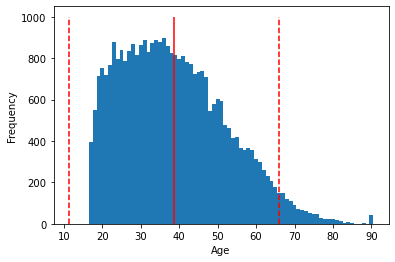

In [35]:
bin_breaks = np.linspace(start = df.age.min() - 0.5,
                         stop = df.age.max() + 0.5,
                         num = df.age.max() - df.age.min() + 2)

plt.figure()
plt.hist(df.age, bins = bin_breaks, density = False)
plt.vlines(df.age.mean(), 0, 1000, color = 'r')
plt.vlines([df.age.mean() - 2 * df.age.std(), df.age.mean() + 2 * df.age.std()], 0, 1000, color = 'r', linestyle='dashed')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Question

Create a boxplot of the ages for females and males. What statistics are used to compute the size of the box, the midline, and the whiskers and points? Given the histogram above, can you predict what it will look like?

#### Answer

The midline is the median, the box extends to the first and third quantiles and the whiskers extend to the furthest datapoint within 1.5 IQR of the box. Points beyond the whiskers are represented by points. Given the long tail in the histogram it is not surprising that there are "outliers" at the high age end.

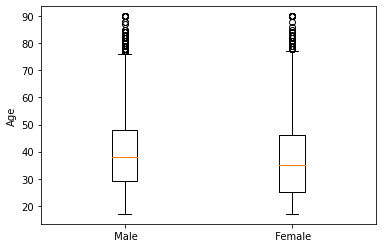

In [36]:
unique_sex = df.sex.unique()
age_grouped = [df[df.sex == sex]['age'] for sex in unique_sex]

plt.figure()
plt.boxplot(x = age_grouped, labels = unique_sex)
plt.ylabel("Age")
plt.show()

### Question

Draw a Tufte style boxplot of the same data. For example, in one variation (of many) the midline is replaced by a point, the box is omitted and the whiskers extend to the most extreme points.

- [hint](https://jrnold.github.io/ggthemes/reference/geom_tufteboxplot.html)

#### Answer

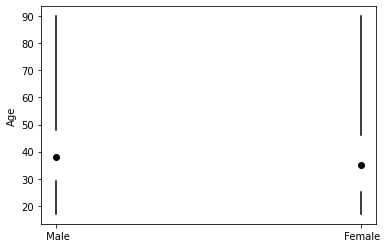

In [37]:
plt.figure()
plt.scatter(x = unique_sex, y = [d.median() for d in age_grouped], color = 'k')
for sex, data in zip(unique_sex, age_grouped):
    plt.plot([sex,sex], [data.min(), data.quantile(0.25)], color = 'k')
    plt.plot([sex,sex], [data.max(), data.quantile(0.75)], color = 'k')
plt.ylabel("Age")
plt.show()